In [2]:
TRAIN="chest_xray/train"
TEST="chest_xray/test"
VAL="chest_xray/val"
train_normal="chest_xray/train/NORMAL"
train_covid="chest_xray/train/PNEUMONIA"
test_normal="chest_xray/test/NORMAL"
test_covid="chest_xray/test/PNEUMONIA"

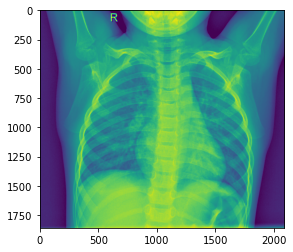

In [3]:
import matplotlib.pyplot as plt
im = plt.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(im)
plt.show()

In [4]:
#DATAFRAME CREATION 
import os
import pandas as pd
filenames = os.listdir("chest_xray/train/NORMAL")
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'IM':
        categories.append(1)
    else:
        categories.append(0)

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})
filenames = os.listdir("chest_xray/train/PNEUMONIA")
categories = []
for filename in filenames:
    category = filename.split('1')[0]
    if category == 'person':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
#DATA AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [7]:
#THE CNN ARCHITECTURE
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import optimizers
from keras import backend as K
from keras import regularizers
model = Sequential()
#First Conv2D Layer
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Conv2D Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Third Conv2D Layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Fourth Conv2D Layer
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Fifth Conv2D Layer
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#FC Layers
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5))) #Regularisation
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5))) #Regularisation
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))#Regularisation
model.add(Dropout(0.5)) #Dropout Regularisation
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4), #Regularisation
    activity_regularizer=regularizers.l2(1e-5)))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

In [10]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [11]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
500/500 [==============================] - 330s 660ms/step - loss: 0.8998 - acc: 0.7416 - val_loss: 1.0060 - val_acc: 0.6242
Epoch 2/10
500/500 [==============================] - 305s 610ms/step - loss: 0.6764 - acc: 0.7674 - val_loss: 0.6723 - val_acc: 0.7645
Epoch 3/10
500/500 [==============================] - 321s 642ms/step - loss: 0.5189 - acc: 0.8413 - val_loss: 0.5669 - val_acc: 0.8677
Epoch 4/10
500/500 [==============================] - 348s 696ms/step - loss: 0.4188 - acc: 0.8671 - val_loss: 0.5221 - val_acc: 0.7903
Epoch 5/10
500/500 [==============================] - 339s 678ms/step - loss: 0.3563 - acc: 0.8829 - val_loss: 0.6117 - val_acc: 0.8532
Epoch 6/10
500/500 [==============================] - 387s 774ms/step - loss: 0.3250 - acc: 0.8871 - val_loss: 0.3896 - val_acc: 0.8871
Epoch 7/10
500/500 [==============================] - 426s 851ms/step - loss: 0.2966 - acc: 0.8915 - val_los

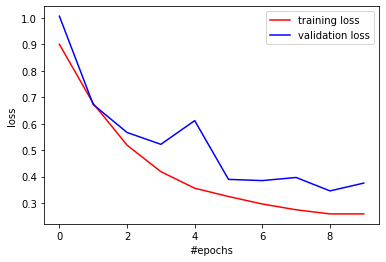

In [12]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

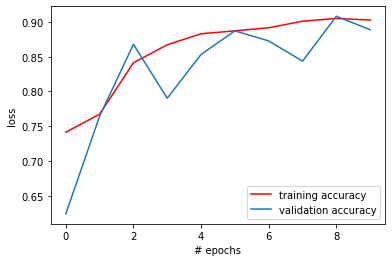

In [13]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
import tensorflow as tf
from keras.models import load_model
model.save('best.h5')